## Load parquet

In [1]:
%matplotlib widget
%matplotlib inline

In [2]:

import pandas as pd

import matplotlib.pyplot as plt
import pandas_ta as ta

In [3]:
df = pd.read_parquet("data.parquet")

In [4]:
df.head()

,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0
1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0
2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0
3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0
4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0


In [5]:
df.groupby("name").count()

,id,figi,ts,open_price,close_price,high_price,low_price,volume
name,,,,,,,,
AT&T,101134,101134,101134,101134,101134,101134,101134,101134
Apple,119367,119367,119367,119367,119367,119367,119367,119367
JPMorgan,85536,85536,85536,85536,85536,85536,85536,85536


## Analyze single stock

### Create dataset with sliding averages

In [53]:
sliding_window_df = df[df["id"] == 1].reset_index()

In [54]:
sliding_window_df.head()

,index,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0
1,1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0
2,2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0
3,3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0
4,4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0


In [55]:

# List of all indicators
sliding_window_df.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.2.23b0
Total Indicators: 123
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


In [56]:
help(ta.macd)

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram.  The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
    Args:
        close (pd.Series): Series of 'close's
        fast (int): The short period.  Default: 12
        slow (int): The long period.   Default: 26
        signal 

Add metrics

In [57]:
# Add MACD
sliding_window_df.ta.macd(append=True)

# Add RSI
sliding_window_df.ta.rsi(9, append=True)

# Add MFI
sliding_window_df.ta.mfi(append=True)

sliding_window_df.head()

,index,name,id,figi,ts,open_price,close_price,high_price,low_price,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_9,MFI_14
0,0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0,NaN,NaN,NaN,NaN,NaN
1,1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0,NaN,NaN,NaN,NaN,NaN
2,2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0,NaN,NaN,NaN,100.000000,NaN
3,3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0,NaN,NaN,NaN,90.322581,NaN
4,4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0,NaN,NaN,NaN,94.672586,NaN


In [58]:
sliding_window_df.describe()

,index,id,open_price,close_price,high_price,low_price,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_9,MFI_14
count,85536.000000,85536.0,85536.000000,85536.000000,85536.000000,85536.000000,85536.000000,85511.000000,85511.000000,85528.000000,85534.000000,8.552300e+04
mean,160824.458064,1.0,108.869357,108.868067,108.965903,108.769106,17384.196935,0.000945,-0.000004,0.000949,49.948045,4.893427e+01
std,89950.782007,0.0,12.836169,12.837386,12.816483,12.857599,23507.344659,0.331436,0.107139,0.309003,14.824603,2.128730e+01
min,0.000000,1.0,77.570000,77.250000,78.640000,76.930000,1.000000,-5.099767,-2.370230,-4.474312,3.121379,-2.910913e-10
25%,82402.750000,1.0,99.390000,99.390000,99.490000,99.280000,79.000000,-0.113025,-0.036314,-0.107513,39.692387,3.478548e+01
50%,169457.500000,1.0,108.110000,108.110000,108.200000,108.020000,12355.000000,0.000336,-0.000516,0.000513,50.179243,4.895652e+01
75%,238955.250000,1.0,115.510000,115.500000,115.590000,115.430000,24494.250000,0.120574,0.036310,0.115109,60.316225,6.299376e+01
max,305699.000000,1.0,141.240000,141.240000,141.240000,141.240000,515849.000000,3.564853,1.535910,3.143031,100.000000,1.000000e+02


Add RSI oversold and overbought

In [59]:
RSI_oversold_threshold = 30
RSI_overbouht_threshold = 70

sliding_window_df["RSI_oversold"] = sliding_window_df["RSI_9"] <= RSI_oversold_threshold
sliding_window_df["RSI_overbought"] = sliding_window_df["RSI_9"] >= RSI_overbouht_threshold

Add MFI oversold

In [60]:
MFI_oversold_threshold = 20
MFI_overbouht_threshold = 80

sliding_window_df["MFI_oversold"] = sliding_window_df["MFI_14"] <= MFI_oversold_threshold
sliding_window_df["MFI_overbought"] = sliding_window_df["MFI_14"] >= MFI_overbouht_threshold

Add MACD signal crossover and cross under

In [61]:
sliding_window_df["MACD_diff"] = sliding_window_df["MACD_12_26_9"].diff()
sliding_window_df["MACD_crossover"] = (sliding_window_df["MACD_diff"] >= 0) & (sliding_window_df["MACD_diff"].shift() <= 0)
sliding_window_df["MACD_crossunder"] = (sliding_window_df["MACD_diff"] <= 0) & (sliding_window_df["MACD_diff"].shift() >= 0)

Show MACD RSI

/home/iakrevetkho/.local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


KeyboardInterrupt: 

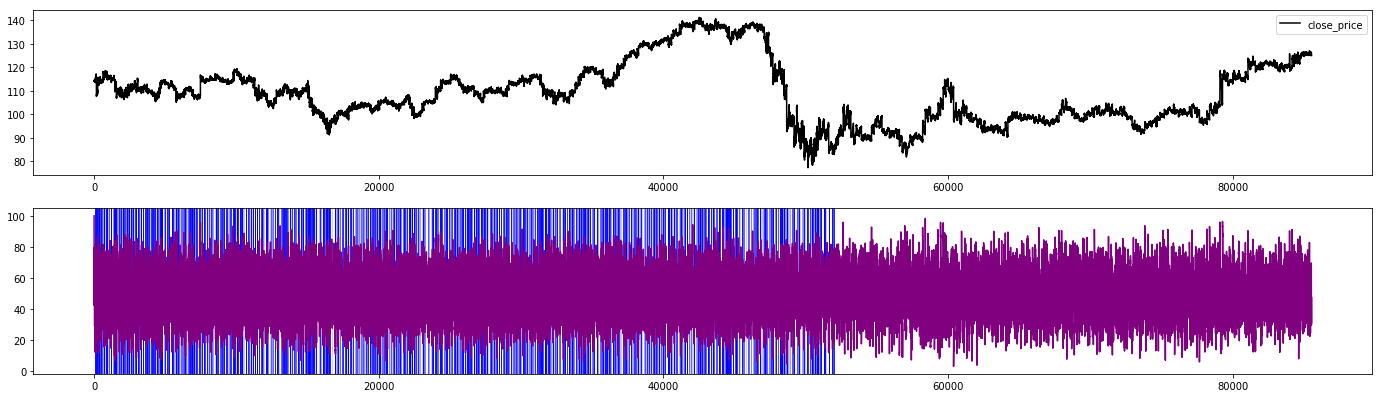

In [62]:
plt.figure(figsize=(24,14))
plt.subplot(4, 1, 1)
sliding_window_df["close_price"].plot(color="black")
plt.legend()

plt.subplot(4, 1, 2)
ax = sliding_window_df["RSI_9"].plot(color="purple")
# Show oversold zone
for x in sliding_window_df[sliding_window_df["RSI_oversold"]].index:
    ax.axvspan(x, x+1, alpha=0.2, color='blue')
# Show overbought zone
for x in sliding_window_df[sliding_window_df["RSI_overbought"]].index:
    ax.axvspan(x, x+1, alpha=0.2, color='green')
plt.legend()

plt.subplot(4, 1, 3)
ax = sliding_window_df["MFI_14"].plot(color="brown")
# Show oversold zone
for x in sliding_window_df[sliding_window_df["MFI_oversold"]].index:
    ax.axvspan(x, x+1, alpha=0.2, color='blue')
# Show overbought zone
for x in sliding_window_df[sliding_window_df["MFI_overbought"]].index:
    ax.axvspan(x, x+1, alpha=0.2, color='green')
plt.legend()

plt.subplot(4, 1, 4)
sliding_window_df["MACDh_12_26_9"].plot(color="red",kind="bar")
sliding_window_df["MACDs_12_26_9"].plot(color="blue")
ax = sliding_window_df["MACD_12_26_9"].plot(color="green")
# Show crossover moments
for x in sliding_window_df[sliding_window_df["MACD_crossover"]].index:
    ax.axvspan(x, x+1, alpha=0.2, color='blue')
# Show crossunder moments
for x in sliding_window_df[sliding_window_df["MACD_crossunder"]].index:
    ax.axvspan(x, x+1, alpha=0.2, color='green')
plt.legend()

# Create manual bot

In [ ]:
import random

class TradingMRMBot:
    def __init__(self):
        self.reset()
    
    def reset(self):
        # init flags
        # RSI
        self.rsi_oversold_flag = False
        self.rsi_overbought_flag = False
        # MFI
        self.mfi_oversold_flag = False
        self.mfi_overbought_flag = False
        # MACD
        self.macd_crossover_flag = False
        self.macd_crossunder_flag = False
        
        # Bought price
        self.balance = 0
        # Profit
        self.profit = 0
    
    def process(self, data):
        # BUY flags
        if data["RSI_oversold"]:
            # Save True flag
            self.rsi_oversold_flag = True
            
        if data["MFI_oversold"]:
            # Save True flag
            self.mfi_oversold_flag = True
        
        # Reset rsi flag if inverse MACD signal
        if self.rsi_oversold_flag & data["MACD_crossunder"]:
            self.rsi_oversold_flag = False
            
        # Reset mfi flag if inverse MACD signal
        if self.mfi_oversold_flag & data["MACD_crossunder"]:
            self.mfi_oversold_flag = False
        
        if self.rsi_oversold_flag & self.mfi_oversold_flag & data["MACD_crossover"]:
            # BUY Signal
            
            # Check that we can buy
            if self.balance == 0:
                current_price = random.uniform(data["open_price"],data["close_price"])
                print("Step: %d Buy with price=%f" % (data["index"], current_price))

                # Set balance
                self.balance = current_price

                # Reset flags
                self.rsi_oversold_flag = False
                self.mfi_oversold_flag = False
            else:
                print("ERROR. Can't buy, if we already bought.")
        
        # SELL flags
        if data["RSI_overbought"]:
            # Save True flag
            self.rsi_overbought_flag = True
            
        if data["MFI_overbought"]:
            # Save True flag
            self.mfi_overbought_flag = True
        
        # Reset rsi flag if inverse MACD signal
        if self.rsi_overbought_flag & data["MACD_crossover"]:
            self.rsi_overbought_flag = False
            
        # Reset mfi flag if inverse MACD signal
        if self.mfi_overbought_flag & data["MACD_crossover"]:
            self.mfi_overbought_flag = False
        
        if self.rsi_overbought_flag & self.mfi_overbought_flag & data["MACD_crossunder"]:
            # SELL Signal
            
            # Check that we can sell
            if self.balance != 0:
                current_price = random.uniform(data["open_price"],data["close_price"])
                print("Step: %d Sell with price=%f" % (data["index"], current_price))

                # Calc profit
                self.profit += (current_price - self.balance) / self.balance
                print("Profit %.2f%%" % (self.profit * 100))
                # Set balance
                self.balance = 0

                # Reset flags
                self.rsi_oversold_flag = False
                self.mfi_oversold_flag = False
            else:
                print("ERROR. Can't sell, if we already sold.")
            
            # Reset flags
            self.rsi_overbought_flag = False
            self.mfi_overbought_flag = False
        

In [63]:
# Test bot
bot = TradingMRMBot()

bot.reset()

for index, data in sliding_window_df.iterrows():
    bot.process(data)

Step: 75 Buy with price=114.225251
Step: 331 Sell with price=115.690000
Profit 1.28%
Step: 642 Buy with price=114.375332
Step: 734 Sell with price=109.387285
Profit -3.08%
Step: 846 Buy with price=108.640586
Step: 999 Sell with price=115.530000
Profit 3.26%
Step: 1041 Buy with price=114.712103
ERROR. Can't buy, if we already bought.
ERROR. Can't buy, if we already bought.
Step: 2171 Sell with price=117.836593
Profit 5.99%
Step: 2214 Buy with price=117.455093
ERROR. Can't buy, if we already bought.
ERROR. Can't buy, if we already bought.
Step: 2483 Sell with price=117.803033
Profit 6.28%
Step: 2518 Buy with price=117.455934
ERROR. Can't buy, if we already bought.
Step: 2810 Sell with price=116.836504
Profit 5.76%
Step: 2837 Buy with price=117.023518
ERROR. Can't buy, if we already bought.
ERROR. Can't buy, if we already bought.
Step: 3167 Sell with price=116.276673
Profit 5.12%
ERROR. Can't sell, if we already sold.
ERROR. Can't sell, if we already sold.
Step: 4326 Buy with price=114.63